In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sarcasm-data/sarcasm.json


# Import required Libraries

In [2]:
import io
import json
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


# Initialize gloabal variables

In [3]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
training_size = 20000

# Importing and Spliting the dataset into training, validation and testing 

In [4]:
with open("../input/sarcasm-data/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []
urls = []
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

# Word Tokenization

In [5]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index
#print(word_index)
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
#print(training_padded)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
#print(testing_padded)

## Converting the data into numpy arrays


In [6]:
#Need this block to get it to work with TensorFlow 2.x
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

# Create the NLP model and compile it

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


2022-08-08 19:33:51.343073: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


# Training

In [8]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs,
                    validation_data=(testing_padded, testing_labels), verbose=2)

2022-08-08 19:33:51.527698: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
625/625 - 2s - loss: 0.6622 - accuracy: 0.5891 - val_loss: 0.5742 - val_accuracy: 0.7186
Epoch 2/30
625/625 - 1s - loss: 0.4317 - accuracy: 0.8306 - val_loss: 0.3943 - val_accuracy: 0.8264
Epoch 3/30
625/625 - 2s - loss: 0.3112 - accuracy: 0.8748 - val_loss: 0.3535 - val_accuracy: 0.8511
Epoch 4/30
625/625 - 2s - loss: 0.2593 - accuracy: 0.8989 - val_loss: 0.3462 - val_accuracy: 0.8536
Epoch 5/30
625/625 - 2s - loss: 0.2243 - accuracy: 0.9118 - val_loss: 0.3464 - val_accuracy: 0.8559
Epoch 6/30
625/625 - 2s - loss: 0.1964 - accuracy: 0.9259 - val_loss: 0.3608 - val_accuracy: 0.8498
Epoch 7/30
625/625 - 2s - loss: 0.1739 - accuracy: 0.9355 - val_loss: 0.3681 - val_accuracy: 0.8524
Epoch 8/30
625/625 - 2s - loss: 0.1561 - accuracy: 0.9420 - val_loss: 0.3821 - val_accuracy: 0.8529
Epoch 9/30
625/625 - 2s - loss: 0.1401 - accuracy: 0.9492 - val_loss: 0.4066 - val_accuracy: 0.8484
Epoch 10/30
625/625 - 3s - loss: 0.1270 - accuracy: 0.9557 - val_loss: 0.4188 - val_accuracy: 0.8520

# Visualize the model metrics 

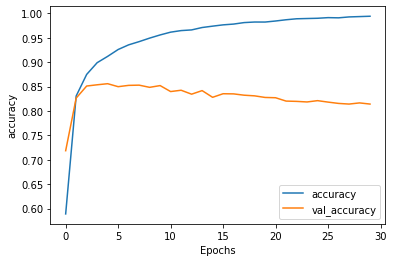

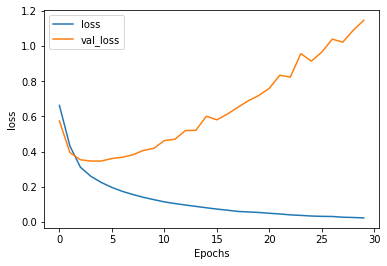

In [9]:
def plot_graphs(h, string):
    plt.plot(h.history[string])
    plt.plot(h.history['val_' + string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_' + string])
    plt.show()


plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [10]:
#Testing the model using some sample data...
sentence = ['Scientists to kill ducks to see why they are dying', 'Safety meeting ends in accident', 'Farms protest continues over low MSP']
sequence = tokenizer.texts_to_sequences(sentence)
padded_sequence = pad_sequences(sequences=sequence, maxlen = 100, padding='post', truncating='post')
result = model.predict(padded_sequence)
print(result)

[[9.9944061e-01]
 [6.7662895e-03]
 [1.9484523e-05]]


# Evaluate The model 

In [11]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])


def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])


print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])


e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)  # shape: (vocab_size, embedding_dim)

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
1
(10000, 16)


In [12]:
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

sentence = ["granny starting to fear spiders in the garden might be real",
            "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[8.4990090e-01]
 [2.3437542e-06]]
